In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mycsv.csv')
df

,Date/Time,Date/Time (UTC),TOTAL WIND BASE SCHEDULE (FORECAST) IN BPA CONTROL AREA (MW; SCADA 187517,TOTAL WIND BASEPOINT (FORECAST) IN BPA CONTROL AREA (MW; SCADA 103349,TOTAL WIND GENERATION IN BPA CONTROL AREA (MW; SCADA 79687),TOTAL BPA CONTROL AREA LOAD (MW; SCADA 45583),TOTAL HYDRO GENERATION (MW; SCADA 79682),TOTAL FOSSIL/BIOMASS GENERATION (MW; SCADA 164377),TOTAL NUCLEAR GENERATION (MW; 70681),NET INTERCHANGE (MW; SCADA 45581),TOTAL SOLAR BASE SCHEDULE (FORECAST) IN BPA CONTROL AREA (MW; SCADA 187513),TOTAL SOLAR Basepoint (FORECAST) IN BPA CONTROL AREA (MW; SCADA 177165),TOTAL SOLAR GENERATION IN BPA CONTROL AREA (MW; SCADA 142383)
0,01-01-2022 00:00,01-01-2022 08:00,NaN,27.0,5.0,8320.0,10817.0,1096.0,1159.0,4757.0,NaN,0.0,0.0
1,01-01-2022 00:05,01-01-2022 08:05,NaN,24.0,5.0,8338.0,10960.0,1079.0,1165.0,4872.0,NaN,0.0,0.0
2,01-01-2022 00:10,01-01-2022 08:10,NaN,21.0,5.0,8337.0,11036.0,1056.0,1164.0,4925.0,NaN,0.0,0.0
3,01-01-2022 00:15,01-01-2022 08:15,NaN,21.0,6.0,8342.0,11084.0,1037.0,1165.0,4950.0,NaN,0.0,0.0
4,01-01-2022 00:20,01-01-2022 08:20,NaN,21.0,6.0,8354.0,11085.0,1032.0,1161.0,4930.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86383,10/27/22 23:35,10/28/22 06:35,579.0,701.0,670.0,5282.0,4361.0,1097.0,1152.0,1998.0,0.0,0.0,0.0
86384,10/27/22 23:40,10/28/22 06:40,579.0,686.0,678.0,5244.0,4332.0,1095.0,1149.0,2013.0,0.0,0.0,0.0
86385,10/27/22 23:45,10/28/22 06:45,579.0,678.0,680.0,5223.0,4366.0,1096.0,1149.0,2068.0,0.0,0.0,0.0
86386,10/27/22 23:50,10/28/22 06:50,579.0,681.0,687.0,5216.0,4351.0,1097.0,1149.0,2069.0,0.0,0.0,0.0


In [3]:
df1 = df[['Date/Time', 'TOTAL WIND GENERATION  IN BPA CONTROL AREA (MW; SCADA 79687)']]
df1.rename(columns={'TOTAL WIND GENERATION  IN BPA CONTROL AREA (MW; SCADA 79687)': 'WindPower'}, inplace=True)
df1.set_index('Date/Time', inplace=True)
df1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18692\1315962383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'TOTAL WIND GENERATION  IN BPA CONTROL AREA (MW; SCADA 79687)': 'WindPower'}, inplace=True)


,WindPower
Date/Time,
01-01-2022 00:00,5.0
01-01-2022 00:05,5.0
01-01-2022 00:10,5.0
01-01-2022 00:15,6.0
01-01-2022 00:20,6.0
...,...
10/27/22 23:35,670.0
10/27/22 23:40,678.0
10/27/22 23:45,680.0


In [4]:
df1.dtypes

WindPower    float64
dtype: object

In [5]:
df1.isnull().sum()

WindPower    12
dtype: int64

<AxesSubplot:xlabel='Date/Time'>

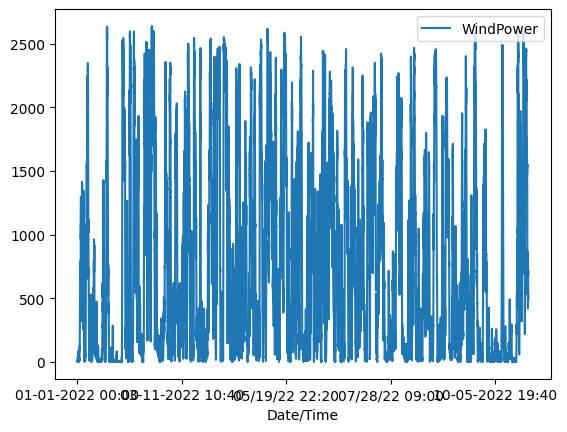

In [6]:
df1.plot()

In [7]:
mean_wind_power = df1['WindPower'].mean()

df1['WindPower'].fillna(mean_wind_power, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18692\4027946816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['WindPower'].fillna(mean_wind_power, inplace=True)


In [8]:
df1.isnull().sum()

WindPower    0
dtype: int64

In [9]:
df_new = df1.describe().transpose()
df_new

,count,mean,std,min,25%,50%,75%,max
WindPower,86388.0,732.712744,757.830476,0.0,81.0,423.0,1270.0,2641.0


In [10]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        # Extract a window of data with 'window_size' time steps
        window = df_as_np[i:i+window_size]

        # Append the window to X
        X.append(window)

        # Extract the label (next data point after the window)
        label = df_as_np[i+window_size]

        # Append the label to y
        y.append(label)

    # Convert X and y to NumPy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y

In [11]:
WINDOW_SIZE = 12
X1, y1 = df_to_X_y(df1, WINDOW_SIZE)
X1.shape, y1.shape

((86376, 12, 1), (86376, 1))

In [12]:
length = len(df)

# Convert to integers
train_length = int(0.7 * length)
val_length = int(0.85 * length)

X_train1, y_train1 = X1[:train_length], y1[:train_length]
X_val1, y_val1 = X1[train_length:val_length], y1[train_length:val_length]
X_test1, y_test1 = X1[val_length:], y1[val_length:]

# Check the shapes
print(X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape)


(60471, 12, 1) (60471, 1) (12958, 12, 1) (12958, 1) (12947, 12, 1) (12947, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Reshape and flatten X_train1, X_val1, X_test1
X_train1_reshaped = X_train1.reshape(-1, X_train1.shape[-1])
X_val1_reshaped = X_val1.reshape(-1, X_val1.shape[-1])
X_test1_reshaped = X_test1.reshape(-1, X_test1.shape[-1])

# Fit and transform the scalers on the training data
X_train1_normalized = scaler_X.fit_transform(X_train1_reshaped)
y_train1_normalized = scaler_y.fit_transform(y_train1.reshape(-1, 1))

# Reshape the normalized data back to the original shape
X_train1_normalized = X_train1_normalized.reshape(X_train1.shape)
y_train1_normalized = y_train1_normalized.reshape(y_train1.shape)

# Transform the validation and test data using the fitted scalers
X_val1_normalized = scaler_X.transform(X_val1_reshaped)
X_test1_normalized = scaler_X.transform(X_test1_reshaped)

# Reshape the normalized data back to the original shape for validation and test
X_val1_normalized = X_val1_normalized.reshape(X_val1.shape)
X_test1_normalized = X_test1_normalized.reshape(X_test1.shape)

y_val1_normalized = scaler_y.transform(y_val1.reshape(-1, 1))


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((X1.shape[1],1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [15]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=0.0001),
    metrics=[RootMeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError()]
)

In [16]:
history = model1.fit(X_train1_normalized, y_train1_normalized, validation_data=(X_val1_normalized, y_val1_normalized), epochs=100, callbacks=[cp1])


Epoch 1/100
1890/1890 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0825 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 247607.5625

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 15s 7ms/step - loss: 0.0068 - root_mean_squared_error: 0.0825 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 247607.5625 - val_loss: 7.3991e-04 - val_root_mean_squared_error: 0.0272 - val_mean_absolute_error: 0.0178 - val_mean_absolute_percentage_error: 5585.7700
Epoch 2/100
1890/1890 [==============================] - ETA: 0s - loss: 8.6673e-04 - root_mean_squared_error: 0.0294 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 58752.4102

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 12s 6ms/step - loss: 8.6673e-04 - root_mean_squared_error: 0.0294 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 58752.4102 - val_loss: 3.9021e-04 - val_root_mean_squared_error: 0.0198 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 2901.1958
Epoch 3/100
1883/1890 [============================>.] - ETA: 0s - loss: 4.1247e-04 - root_mean_squared_error: 0.0203 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 22053.9316

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 12s 6ms/step - loss: 4.1195e-04 - root_mean_squared_error: 0.0203 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 22016.6777 - val_loss: 2.1290e-04 - val_root_mean_squared_error: 0.0146 - val_mean_absolute_error: 0.0090 - val_mean_absolute_percentage_error: 2127.9819
Epoch 4/100
1889/1890 [============================>.] - ETA: 0s - loss: 3.0058e-04 - root_mean_squared_error: 0.0173 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 18906.8848

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 3.0051e-04 - root_mean_squared_error: 0.0173 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 18899.7012 - val_loss: 1.6902e-04 - val_root_mean_squared_error: 0.0130 - val_mean_absolute_error: 0.0081 - val_mean_absolute_percentage_error: 2496.2217
Epoch 5/100
1884/1890 [============================>.] - ETA: 0s - loss: 2.4716e-04 - root_mean_squared_error: 0.0157 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 17298.5938

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 2.4680e-04 - root_mean_squared_error: 0.0157 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 17268.0352 - val_loss: 1.3282e-04 - val_root_mean_squared_error: 0.0115 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 984.0287
Epoch 6/100
1888/1890 [============================>.] - ETA: 0s - loss: 2.0011e-04 - root_mean_squared_error: 0.0141 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 15051.3584

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 12s 7ms/step - loss: 2.0003e-04 - root_mean_squared_error: 0.0141 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 15037.6758 - val_loss: 1.0664e-04 - val_root_mean_squared_error: 0.0103 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 417.5160
Epoch 7/100
1889/1890 [============================>.] - ETA: 0s - loss: 1.6397e-04 - root_mean_squared_error: 0.0128 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 14148.0410

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 1.6395e-04 - root_mean_squared_error: 0.0128 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 14187.3164 - val_loss: 8.5821e-05 - val_root_mean_squared_error: 0.0093 - val_mean_absolute_error: 0.0056 - val_mean_absolute_percentage_error: 1030.8218
Epoch 8/100
1889/1890 [============================>.] - ETA: 0s - loss: 1.4055e-04 - root_mean_squared_error: 0.0119 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 12453.2686

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 1.4052e-04 - root_mean_squared_error: 0.0119 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 12448.5342 - val_loss: 7.0869e-05 - val_root_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0049 - val_mean_absolute_percentage_error: 192.6850
Epoch 9/100
1889/1890 [============================>.] - ETA: 0s - loss: 1.2587e-04 - root_mean_squared_error: 0.0112 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 11552.0020

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 1.2586e-04 - root_mean_squared_error: 0.0112 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 11555.4580 - val_loss: 6.3450e-05 - val_root_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0046 - val_mean_absolute_percentage_error: 175.2820
Epoch 10/100
1884/1890 [============================>.] - ETA: 0s - loss: 1.1653e-04 - root_mean_squared_error: 0.0108 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 11962.5127

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 1.1642e-04 - root_mean_squared_error: 0.0108 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 11951.1572 - val_loss: 5.9456e-05 - val_root_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0046 - val_mean_absolute_percentage_error: 503.2304
Epoch 11/100
1879/1890 [============================>.] - ETA: 0s - loss: 1.1096e-04 - root_mean_squared_error: 0.0105 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 12832.2119

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 1.1093e-04 - root_mean_squared_error: 0.0105 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 13039.8252 - val_loss: 5.6084e-05 - val_root_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0044 - val_mean_absolute_percentage_error: 186.4597
Epoch 12/100
1890/1890 [==============================] - 10s 5ms/step - loss: 1.0772e-04 - root_mean_squared_error: 0.0104 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 13083.5605 - val_loss: 6.9157e-05 - val_root_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0053 - val_mean_absolute_percentage_error: 878.9145
Epoch 13/100
1880/1890 [============================>.] - ETA: 0s - loss: 1.0402e-04 - root_mean_squared_error: 0.0102 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 11352.5947

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 1.0376e-04 - root_mean_squared_error: 0.0102 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 11313.2910 - val_loss: 5.1904e-05 - val_root_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0041 - val_mean_absolute_percentage_error: 306.5080
Epoch 14/100
1890/1890 [==============================] - 10s 5ms/step - loss: 1.0392e-04 - root_mean_squared_error: 0.0102 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 12065.8467 - val_loss: 5.2817e-05 - val_root_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0042 - val_mean_absolute_percentage_error: 299.4313
Epoch 15/100
1890/1890 [==============================] - 10s 5ms/step - loss: 1.0294e-04 - root_mean_squared_error: 0.0101 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 14178.7607 - val_loss: 5.2538e-05 - val_root_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0042 - val_mean_absolute_percentage_error:

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 1.0146e-04 - root_mean_squared_error: 0.0101 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 12498.2363 - val_loss: 5.0978e-05 - val_root_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0041 - val_mean_absolute_percentage_error: 719.5758
Epoch 18/100
1889/1890 [============================>.] - ETA: 0s - loss: 1.0074e-04 - root_mean_squared_error: 0.0100 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 12785.2900

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 14s 7ms/step - loss: 1.0072e-04 - root_mean_squared_error: 0.0100 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 12780.4297 - val_loss: 5.0888e-05 - val_root_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0041 - val_mean_absolute_percentage_error: 474.9579
Epoch 19/100
1890/1890 [==============================] - 10s 5ms/step - loss: 9.9772e-05 - root_mean_squared_error: 0.0100 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 11629.2656 - val_loss: 5.3038e-05 - val_root_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0042 - val_mean_absolute_percentage_error: 431.7490
Epoch 20/100
1890/1890 [==============================] - 10s 5ms/step - loss: 9.9688e-05 - root_mean_squared_error: 0.0100 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 11540.5254 - val_loss: 5.8029e-05 - val_root_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0049 - val_mean_absolute_percentage_error:

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 9.9459e-05 - root_mean_squared_error: 0.0100 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 12504.4785 - val_loss: 4.9974e-05 - val_root_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 144.4286
Epoch 22/100
1890/1890 [==============================] - 11s 6ms/step - loss: 9.8917e-05 - root_mean_squared_error: 0.0099 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 11506.4619 - val_loss: 5.2135e-05 - val_root_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0043 - val_mean_absolute_percentage_error: 333.1320
Epoch 23/100
1890/1890 [==============================] - ETA: 0s - loss: 9.8860e-05 - root_mean_squared_error: 0.0099 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 12339.4307

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 14s 8ms/step - loss: 9.8860e-05 - root_mean_squared_error: 0.0099 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 12339.4307 - val_loss: 4.9166e-05 - val_root_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 563.3376
Epoch 24/100
1884/1890 [============================>.] - ETA: 0s - loss: 9.8641e-05 - root_mean_squared_error: 0.0099 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11597.9971

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 9.8534e-05 - root_mean_squared_error: 0.0099 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11578.7314 - val_loss: 4.9142e-05 - val_root_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 364.1073
Epoch 25/100
1890/1890 [==============================] - 10s 6ms/step - loss: 9.7961e-05 - root_mean_squared_error: 0.0099 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11862.9551 - val_loss: 5.2110e-05 - val_root_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0044 - val_mean_absolute_percentage_error: 1217.6797
Epoch 26/100
1886/1890 [============================>.] - ETA: 0s - loss: 9.7729e-05 - root_mean_squared_error: 0.0099 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11942.5840

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 14s 7ms/step - loss: 9.7746e-05 - root_mean_squared_error: 0.0099 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11943.7900 - val_loss: 4.8889e-05 - val_root_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 514.1846
Epoch 27/100
1890/1890 [==============================] - 10s 5ms/step - loss: 9.7360e-05 - root_mean_squared_error: 0.0099 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 12293.6064 - val_loss: 6.0605e-05 - val_root_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0053 - val_mean_absolute_percentage_error: 1940.3602
Epoch 28/100
1890/1890 [==============================] - 10s 5ms/step - loss: 9.7606e-05 - root_mean_squared_error: 0.0099 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 12437.6465 - val_loss: 4.9219e-05 - val_root_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0041 - val_mean_absolute_percentage_error

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 9.6958e-05 - root_mean_squared_error: 0.0098 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 11808.7773 - val_loss: 4.8197e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 669.4437
Epoch 31/100
1890/1890 [==============================] - 10s 5ms/step - loss: 9.7044e-05 - root_mean_squared_error: 0.0099 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 12267.3027 - val_loss: 4.8437e-05 - val_root_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 204.1384
Epoch 32/100
1885/1890 [============================>.] - ETA: 0s - loss: 9.6283e-05 - root_mean_squared_error: 0.0098 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11289.4941

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 9.6447e-05 - root_mean_squared_error: 0.0098 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11276.4805 - val_loss: 4.8124e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 324.2076
Epoch 33/100
1890/1890 [==============================] - 10s 5ms/step - loss: 9.5887e-05 - root_mean_squared_error: 0.0098 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 12291.7256 - val_loss: 4.8201e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 270.8622
Epoch 34/100
1890/1890 [==============================] - 11s 6ms/step - loss: 9.5838e-05 - root_mean_squared_error: 0.0098 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 12675.0869 - val_loss: 4.8243e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error:

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 14s 7ms/step - loss: 9.5352e-05 - root_mean_squared_error: 0.0098 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11156.4287 - val_loss: 4.8002e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 929.8486
Epoch 41/100
1890/1890 [==============================] - 10s 5ms/step - loss: 9.4920e-05 - root_mean_squared_error: 0.0097 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11491.1885 - val_loss: 4.8526e-05 - val_root_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 216.2209
Epoch 42/100
1890/1890 [==============================] - 10s 5ms/step - loss: 9.5309e-05 - root_mean_squared_error: 0.0098 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 12705.1865 - val_loss: 5.0382e-05 - val_root_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0041 - val_mean_absolute_percentage_error:

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 9.4707e-05 - root_mean_squared_error: 0.0097 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 10547.0723 - val_loss: 4.7579e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0039 - val_mean_absolute_percentage_error: 333.1597
Epoch 46/100
1890/1890 [==============================] - 10s 5ms/step - loss: 9.4577e-05 - root_mean_squared_error: 0.0097 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10901.4375 - val_loss: 4.7950e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 237.3968
Epoch 47/100
1890/1890 [==============================] - 10s 5ms/step - loss: 9.4856e-05 - root_mean_squared_error: 0.0097 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 11839.0605 - val_loss: 4.9856e-05 - val_root_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0044 - val_mean_absolute_percentage_error:

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 9.4244e-05 - root_mean_squared_error: 0.0097 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10536.0225 - val_loss: 4.7388e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0039 - val_mean_absolute_percentage_error: 174.3858
Epoch 57/100
1890/1890 [==============================] - 10s 5ms/step - loss: 9.3977e-05 - root_mean_squared_error: 0.0097 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10736.3154 - val_loss: 4.7761e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0039 - val_mean_absolute_percentage_error: 127.2197
Epoch 58/100
1890/1890 [==============================] - 9s 5ms/step - loss: 9.3990e-05 - root_mean_squared_error: 0.0097 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10395.2695 - val_loss: 5.2123e-05 - val_root_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0042 - val_mean_absolute_percentage_error: 

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 13s 7ms/step - loss: 9.3694e-05 - root_mean_squared_error: 0.0097 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9148.7764 - val_loss: 4.7307e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0039 - val_mean_absolute_percentage_error: 417.3711
Epoch 68/100
1890/1890 [==============================] - 10s 6ms/step - loss: 9.3723e-05 - root_mean_squared_error: 0.0097 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 10089.7900 - val_loss: 5.1977e-05 - val_root_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0042 - val_mean_absolute_percentage_error: 163.2351
Epoch 69/100
1890/1890 [==============================] - ETA: 0s - loss: 9.3542e-05 - root_mean_squared_error: 0.0097 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9133.4531

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1890/1890 [==============================] - 14s 7ms/step - loss: 9.3542e-05 - root_mean_squared_error: 0.0097 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9133.4531 - val_loss: 4.7224e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0039 - val_mean_absolute_percentage_error: 248.4905
Epoch 70/100
1890/1890 [==============================] - 10s 5ms/step - loss: 9.3756e-05 - root_mean_squared_error: 0.0097 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9420.2842 - val_loss: 4.7673e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0039 - val_mean_absolute_percentage_error: 204.8022
Epoch 71/100
1890/1890 [==============================] - 10s 5ms/step - loss: 9.3502e-05 - root_mean_squared_error: 0.0097 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9423.6201 - val_loss: 4.7250e-05 - val_root_mean_squared_error: 0.0069 - val_mean_absolute_error: 0.0039 - val_mean_absolute_percentage_error: 13

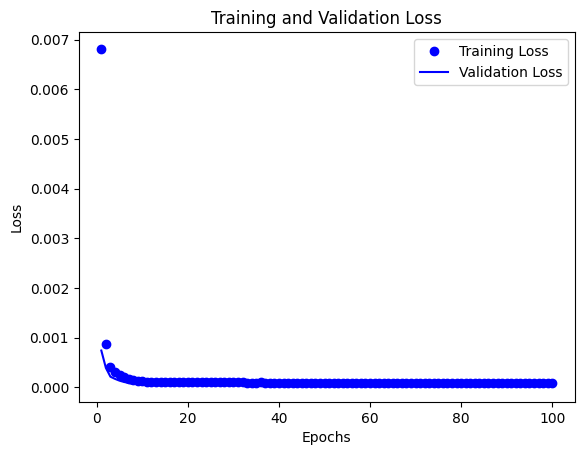

In [17]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
validation_results = model1.evaluate(X_val1_normalized, y_val1_normalized)


405/405 [==============================] - 1s 2ms/step - loss: 4.7557e-05 - root_mean_squared_error: 0.0069 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 786.5746


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(InputLayer((X1.shape[1],1)))
model2.add(LSTM(64, return_sequences=True)) 
model2.add(LSTM(32))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 29,585
Trainable params: 29,585
Non-trainable params: 0
_________________________________________________________________


In [22]:
model2.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=0.0001),
    metrics=[RootMeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError()]
)
history = model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20)

Epoch 1/20
1890/1890 [==============================] - 19s 8ms/step - loss: 938796.4375 - root_mean_squared_error: 968.9151 - mean_absolute_error: 639.5883 - mean_absolute_percentage_error: 10937656.0000 - val_loss: 709577.5000 - val_root_mean_squared_error: 842.3643 - val_mean_absolute_error: 520.1095 - val_mean_absolute_percentage_error: 1280189.6250
Epoch 2/20
1890/1890 [==============================] - 15s 8ms/step - loss: 871427.5625 - root_mean_squared_error: 933.5029 - mean_absolute_error: 604.3412 - mean_absolute_percentage_error: 12460599.0000 - val_loss: 651201.1250 - val_root_mean_squared_error: 806.9703 - val_mean_absolute_error: 487.7183 - val_mean_absolute_percentage_error: 1378831.2500
Epoch 3/20
1890/1890 [==============================] - 15s 8ms/step - loss: 799718.5000 - root_mean_squared_error: 894.2698 - mean_absolute_error: 566.8983 - mean_absolute_percentage_error: 13764373.0000 - val_loss: 590529.6250 - val_root_mean_squared_error: 768.4592 - val_mean_absolute

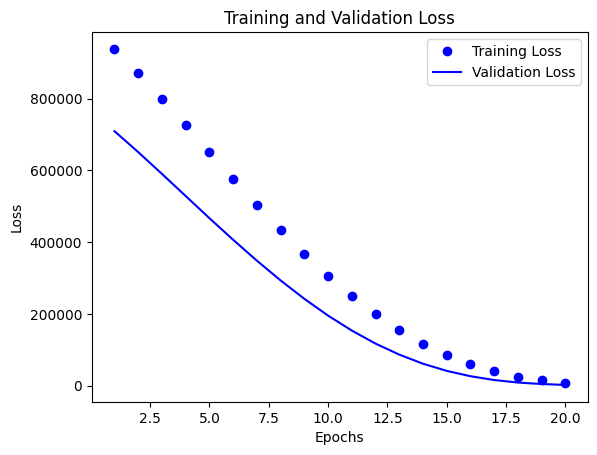

In [23]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, LSTM

model3 = Sequential()
model3.add(Conv1D(64, kernel_size=2, input_shape=(X1.shape[1],1)))  # Specify input shape here
model3.add(LSTM(64, return_sequences=True))  # Add LSTM layer with return_sequences=True
model3.add(Flatten())
model3.add(Dense(8, activation='relu'))  # Use 'activation' instead of just the activation function name
model3.add(Dense(1, activation='linear'))  # Use 'activation' instead of just the activation function name

model3.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 11, 64)            192       
                                                                 
 lstm_5 (LSTM)               (None, 11, 64)            33024     
                                                                 
 flatten_2 (Flatten)         (None, 704)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 5640      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 38,865
Trainable params: 38,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=0.0001),
    metrics=[RootMeanSquaredError(), MeanAbsoluteError(), MeanAbsolutePercentageError()]
)
history = model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20)

Epoch 1/20
1890/1890 [==============================] - 12s 5ms/step - loss: 940823.6250 - root_mean_squared_error: 969.9606 - mean_absolute_error: 643.7150 - mean_absolute_percentage_error: 8293620.0000 - val_loss: 515642.3750 - val_root_mean_squared_error: 718.0825 - val_mean_absolute_error: 417.7435 - val_mean_absolute_percentage_error: 3966103.0000
Epoch 2/20
1890/1890 [==============================] - 9s 5ms/step - loss: 444012.1562 - root_mean_squared_error: 666.3423 - mean_absolute_error: 378.5689 - mean_absolute_percentage_error: 7343455.5000 - val_loss: 180276.7344 - val_root_mean_squared_error: 424.5901 - val_mean_absolute_error: 213.7864 - val_mean_absolute_percentage_error: 1390514.2500
Epoch 3/20
1890/1890 [==============================] - 9s 5ms/step - loss: 149271.3750 - root_mean_squared_error: 386.3565 - mean_absolute_error: 189.5659 - mean_absolute_percentage_error: 9597720.0000 - val_loss: 51939.8672 - val_root_mean_squared_error: 227.9032 - val_mean_absolute_error

In [ ]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()